## Datathon Task

Create an algorithm that, given a set of aircrew slots and constraints, optimizes the flight crew schedule and validates your hypothesis. These solutions should provide insights to the human aircrew Scheduler.
Submit a presentation and methodology with feature sets / attributes and the associated rationale.

<br/><br/>

##### Python Packages to Import

In [2]:
#Import Utilities for Datathon
from DataLoader import *
from ScheduleVisualizer import *
from CheckSchedule import checkSchedule
from satUtils import *

# Import Helpful packages
import pandas as pd
import pprint
import json

# Helpful to print out dictionaries
pp = pprint.PrettyPrinter(indent=4)

<br/><br/>
<br/><br/>

## Load Datathon Data

##### Pilot Data

The data that is loaded here is a python dictionary that contains the necessary information about the pilots. The key values to the dictionary, `pilots.keys()`, represent the unique ids assigned to each pilot.

Each entry in the dictionary then contains the information:
- Leave - A list containing the leave windows for which the staff member is unavailable, ex: [start_day, end_day]
- Quals - A dictionary describing the qualification for this staff member by month

In [3]:
pilots = loadPilotData()

In [9]:
# Example Pilot
pp.pprint(pilots[10002])
len(pilots.keys())

{   'Leave': [[98.0, 101.0], [120.0, 125.0]],
    'Quals': {   'Aug': 'IP BJ',
                 'Dec': 'IP BJ',
                 'Nov': 'IP BJ',
                 'Oct': 'IP BJ',
                 'Sep': 'IP BJ'}}


106

##### Event Data

The data that is loaded here is a python dictionary that contains the necessary information about the events that need scheduling. The key values to the dictionary, `events.keys()`, represent the unique ids assigned to each event.

Each entry in the dictionary then contains the information:
- Category - Indicating the category of event (either "Local" or "Sim")
- Type - The type of event in the given category
- CrewType - Describes the required crew makeup to staff this event
- CrewRequirements - List of minimum crew qualifications for each staff member to run this flight
- CrewMax - Maximum number of staff to run this event
- CrewMin - Minimum number of staff to run this event
- StartDay - Integer representing the start day of the event
- EndDay - Integer representing the end day of the event

In [5]:
events = loadEventData()

In [8]:
# Example Local Flight
pp.pprint(events['f3'])
len(events.keys())

{   'Category': 'Local',
    'CrewMax': 2,
    'CrewMin': 2,
    'CrewRequirements': ['MP+', 'FPC+'],
    'CrewType': 'Basic',
    'EndDay': 64.0,
    'StartDay': 62.0,
    'Type': 'AD Local'}


628

In [7]:
# Example Sim Event
pp.pprint(events['s4'])

{   'Category': 'Sim',
    'CrewMax': 2,
    'CrewMin': 2,
    'CrewRequirements': ['', ''],
    'CrewType': None,
    'EndDay': 62.0,
    'StartDay': 62.0,
    'Type': 'ISS'}


<br/><br/>
<br/><br/>

## Helpers

Here are a couple of functions and tools that you may find useful

##### Data Processing

You can use the ```satisfiableMember``` function to see if a qualification fulfills a certain requirement.

In [7]:
satisfiableMember("MP+", "IP A") # True
satisfiableMember("MP+", "IP A2") # True
satisfiableMember("MP+", "FPNC") # False

False

The ```satisfiable``` function tests whether a series of qualifications can fulfill the requirements for a crew, in any possible ordering.

In [8]:
satisfiable(["MP+", "FPC+"], ["MP B", "FPCC"]) # True
satisfiable(["MP+", "FPC+"], ["FPCC", "MP B"]) # True, order does not matter
satisfiable(["MP+", "FPC+"], ["FPCC", "FPQC"]) # False

False

The ```requirements``` dictionary maps CrewRequirements to a tuple containing the number of characters necessary to determine if a pilot's qualification meets a certain requirements.

In [9]:
# 'EP A', 'EP A1', or 'EP A2' could fulfill because only the first 4 characters matter.
print(requirements["FPC+"]) 

# 'IP AX' can fulfill, but not an 'IP A' because all 5 characters matter.
print(requirements["MP CJ+"]) 

(4, {'FPCC', 'MP C', 'IP B', 'FPQC', 'MP B', 'IP A', 'EP A', 'FPLC', 'FPKC'})
(5, {'IP BX', 'MP CJ', 'IP AX', 'IP BJ'})


##### Visualization

You can use the function `pilotLeave` to plot which days pilots are unavailable (red) by passing in a list of the pilots you wish to look at

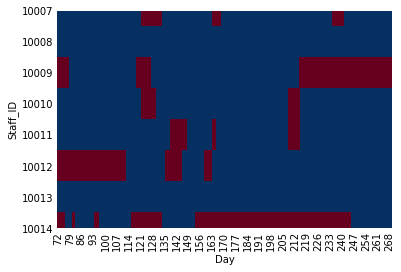

In [10]:
pilotLeave([10007,10008,10009,10010,10011,10012,10013,10014])

You can use the function `eventCalendar` to plot the days missions are set to occur (red) by passing in a list of the ids of events you wish to look at

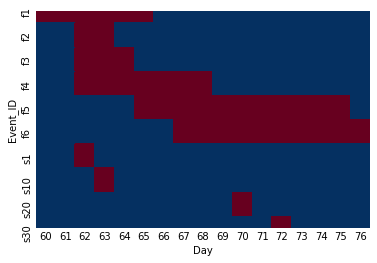

In [11]:
eventCalendar(['f1','f2','f3','f4','f5','f6','s1','s10','s20','s30'])

<br/><br/>
<br/><br/>

## Your Analysis

##### Solution Template

Using the above data, you will need to assign pilots to events. We've provided an empty template of what we expect a solution dictionary to look like. The top level has two keys: Events and Staff

For each Event, if you would like to move the start time of the event, please rewrite the start time 

For each Staff, append all events you are assigning them to (by event id) to their respective empty list

In [ ]:
solution = solutionTemplate()

##### Your Code
Use this space to write any code to analyze the data and make any assignments within the `solution` variable

<br/><br/>
<br/><br/>

## Validate Solution

```checkSchedule``` will return ```True``` if your schedule is valid, and ```False``` otherwise.

When the optional ```verbose``` parameter is set to True, its default option, the function will also print relevant information, warning, and error messages.

You may pass your schedule in as a Python dictionary, or as a string representing a file path leading to a JSON file where you have the schedule saved.

In [ ]:
checkSchedule(solution, verbose=False)

## Save Solution


In [ ]:
solutionFilename = "solution5.json" # Modify only this line to save the json file

import os
assert solutionFilename[-5:] == ".json", "Filname must end with '.json'"
assert solutionFilename not in os.listdir("."), "File already exists. If you want to replace it, delete it and then run this code again."
with open(solutionFilename, "w+") as fp:
    json.dump(solution, fp)